# Table of content

- Problem Statement
- Dataset
  - IMDB - 25000
  - fist use only a sample/fraciton of the data - 1%
  - basic exploration of the data 
- Text to Number 
  - preprocess - clean/tokenize/encode
  - Bag-Of-Words vs Sequential models
- Bayes - occurence frequency
 - Bayes
 - Naive Bayes
 - Word sentiment visualization
- Linear Regression - term-document matrix
 - Sparse matrix representations
 - Bigrams
 - Trigrams
 - why not go 10 grams - exponential number, large combination appear rarely - so they can carry less information, not enough information
- Huggingface model

# Problem Statement

**Sentiment Analysis**

Binary classification (positive vs negative sentiment) of movie reviews.

Techinques:
- Classical machine learning techniques (Naive Bayes, Logistic Regression) 
- Deep learning techniques (Recurrent Neural Networks, Embeddings) 
  
Learning Type:
- supervised learning - using labelled dataset
 - data => model (based on patterns)
 - training vs validation vs test
- unsupervised learning


Evaluation:
- accuracy - on test set (correcly predicted number / total number)
- false positives / false negatives









# Dataset

## Huggingface

- [huggingface Hub](https://huggingface.co/docs/datasets/index) - contains lots of open source models and dataset
- huggingface [DataViewer WebApp](https://huggingface.co/datasets/viewer/) - to browse and explore dataset
- huggingface [datasets v2](https://huggingface.co/docs/datasets/installation) - documentation
- huggingface [datasets v1](https://huggingface.co/docs/datasets/v1.11.0/loading_datasets.html) - documentation

In [ ]:
!pip install datasets

In [12]:
import datasets
datasets.__version__

'2.6.1'

In [10]:
from datasets import load_dataset
imdb_dataset = load_dataset("imdb")

  0%|          | 0/3 [00:00<?, ?it/s]

In [3]:
imdb_dataset

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 25000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 25000
    })
    unsupervised: Dataset({
        features: ['text', 'label'],
        num_rows: 50000
    })
})

The large movie review dataset contains a collection of 50,000 reviews from IMDB.

- The dataset contains an even number of positive and negative reviews **<- let's verify this!!**
- The authors considered only highly polarized reviews. 
  - a negative review has a score ≤ 4 out of 10
  - a positive review has a score ≥ 7 out of 10
  - neutral reviews are not included in the dataset
- The dataset is divided into training and test sets. The training set is the same 25,000 labeled reviews
- There is additional 50,000 unlabeled data for use as well

**What is the difference between training / validation / test set?** 

**Why do we need all three?**

In [4]:
print(imdb_dataset.shape)
print(imdb_dataset.num_columns)
print(imdb_dataset.column_names)

{'train': (25000, 2), 'test': (25000, 2), 'unsupervised': (50000, 2)}
{'train': 2, 'test': 2, 'unsupervised': 2}
{'train': ['text', 'label'], 'test': ['text', 'label'], 'unsupervised': ['text', 'label']}


In [262]:
imdb_dataset['train'][-1]

{'text': 'The story centers around Barry McKenzie who must go to England if he wishes to claim his inheritance. Being about the grossest Aussie shearer ever to set foot outside this great Nation of ours there is something of a culture clash and much fun and games ensue. The songs of Barry McKenzie(Barry Crocker) are highlights.',
 'label': 1}

In [263]:
train_x_1 = [data for data in imdb_dataset['train'][:500]['text']]
train_y_1 = [data for data in imdb_dataset['train'][:500]['label']]
train_x_2 = [data for data in imdb_dataset['train'][20000:20500]['text']]
train_y_2 = [data for data in imdb_dataset['train'][20000:20500]['label']]

train_x = []
train_x.extend(train_x_1)
train_x.extend(train_x_2)

train_y = []
train_y.extend(train_y_1)
train_y.extend(train_y_2)



test_x_1 = [data for data in imdb_dataset['test'][:500]['text']]
test_y_1 = [data for data in imdb_dataset['test'][:500]['label']]
test_x_2 = [data for data in imdb_dataset['test'][20000:20500]['text']]
test_y_2 = [data for data in imdb_dataset['test'][20000:20500]['label']]


In [299]:
a = [1,2,3]
b = [1,2,4]
c = []
c.extend(a)
c.extend(b)
c

[1, 2, 3, 1, 2, 4]

In [266]:
len(train_x)

1000

In [271]:
train_y[2]

0

## Fast.ai

- [fastai v2 - documentation](https://docs.fast.ai/)
- [fastai v1 - documentaiton](https://fastai1.fast.ai/text.data.html#The-TextList-input-classes) - should not be used!

In [ ]:
!pip install fastai
# not needed

In [16]:
import fastai
fastai.__version__

'2.7.9'

- fastai [external datasets documentation](https://docs.fast.ai/data.external.html)

In [14]:
from fastai.text.all import *
imdb_path = untar_data(URLs.IMDB_SAMPLE)

In [15]:
imdb_path

Path('/root/.fastai/data/imdb_sample')

In [16]:
!ls '/root/.fastai/data/imdb_sample'

texts.csv


In [17]:
import pandas as pd

In [40]:
df = pd.read_csv(imdb_path/'texts.csv')
df.head()

,label,text,is_valid
0,negative,"Un-bleeping-believable! Meg Ryan doesn't even look her usual pert lovable self in this, which normally makes me forgive her shallow ticky acting schtick. Hard to believe she was the producer on this dog. Plus Kevin Kline: what kind of suicide trip has his career been on? Whoosh... Banzai!!! Finally this was directed by the guy who did Big Chill? Must be a replay of Jonestown - hollywood style. Wooofff!",False
1,positive,"This is a extremely well-made film. The acting, script and camera-work are all first-rate. The music is good, too, though it is mostly early in the film, when things are still relatively cheery. There are no really superstars in the cast, though several faces will be familiar. The entire cast does an excellent job with the script.<br /><br />But it is hard to watch, because there is no good end to a situation like the one presented. It is now fashionable to blame the British for setting Hindus and Muslims against each other, and then cruelly separating them into two countries. There is som...",False
2,negative,"Every once in a long while a movie will come along that will be so awful that I feel compelled to warn people. If I labor all my days and I can save but one soul from watching this movie, how great will be my joy.<br /><br />Where to begin my discussion of pain. For starters, there was a musical montage every five minutes. There was no character development. Every character was a stereotype. We had swearing guy, fat guy who eats donuts, goofy foreign guy, etc. The script felt as if it were being written as the movie was being shot. The production value was so incredibly low that it felt li...",False
3,positive,"Name just says it all. I watched this movie with my dad when it came out and having served in Korea he had great admiration for the man. The disappointing thing about this film is that it only concentrate on a short period of the man's life - interestingly enough the man's entire life would have made such an epic bio-pic that it is staggering to imagine the cost for production.<br /><br />Some posters elude to the flawed characteristics about the man, which are cheap shots. The theme of the movie ""Duty, Honor, Country"" are not just mere words blathered from the lips of a high-brassed offic...",False
4,negative,"This movie succeeds at being one of the most unique movies you've seen. However this comes from the fact that you can't make heads or tails of this mess. It almost seems as a series of challenges set up to determine whether or not you are willing to walk out of the movie and give up the money you just paid. If you don't want to feel slighted you'll sit through this horrible film and develop a real sense of pity for the actors involved, they've all seen better days, but then you realize they actually got paid quite a bit of money to do this and you'll lose pity for them just like you've alr...",False


In [38]:
print(df.shape)

(1000, 3)


In [39]:
print(type(df['text']))
print(df['text'][20])
print(df['text'].iloc[-1])

<class 'pandas.core.series.Series'>
I first encountered this show when I was staying in Japan for six months last year. I found it in the internet when I was looking for sub-titled dramas to help me with my Japanese. My host mother warned me to stay away from it because she thought it was weird, but I found it delightful! Koyuki showed such conflicting character traits and Matsujun's spirit made my day every time I tuned in! I first saw him on "Hana Yori Dango", but I liked him much better in this!<br /><br />Although the characters are interesting and well-developed, I was disappointed to find that they didn't change very much throughout the show. Their relationship grew, but they didn't really. Still, a fun time had by all (Even for Fukushima!).
A compelling, honest, daring, and unforgettable psychological horror film that touches on the painful experiences of pain caused by rape - "Descent" is a film that went under-the-radar due to its lack of distribution because, frankly, the fil

In [43]:
df['text'].tolist()[-1]

'A compelling, honest, daring, and unforgettable psychological horror film that touches on the painful experiences of pain caused by rape - "Descent" is a film that went under-the-radar due to its lack of distribution because, frankly, the film is so brutal in its depictions, that if it had been released theatrically, it may have met itself to some strong biased hate.<br /><br />The film deserves to be discovered for, not only its dark themes, and not only for its amazing direction and authentic style - but most of all for its performances. Chad Faust is absolutely stunning, bringing enough sickness and enough vulnerability to make one, not relate to, but understand this fractured man with a twisted perspective on his sexuality with not only the women he rapes, but also the fragile insecurities deep within his own self. It\'s a supporting performance that is so complex, brave, and emotional on Faust\'s part. And hard to forget.<br /><br />However, the standout is Rosario Dawson, whose 

# Text to Numbers

Cleaning:
  - remove white space
  - remove accents
  - remove stop words
  - remove punctuations
  - remove URLs/handles
  - spell correction
  - stemming/lemmatization
	- lowercasing

Tokenization:
  - word-based
  - character-based
  - subword-based

Encoding:
  - frequency counts (for each category)
  - 1-hot encoding of the whole vocabulary (sparce matrix)
  - n-grams
  - word embedding (word vectors)

In [53]:
"ALMA".lower()
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

- [NLTK documentation](https://www.nltk.org/api/nltk.tokenize.html#module-nltk.tokenize)

In [82]:
import re
import nltk
from nltk.tokenize import wordpunct_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [94]:
def clean_review(review):
  review = review.lower()
  
  # remove hyperlinks    
  review = re.sub(r'https?://[^\s\n\r]+', '', review)
    
  # remove HTML markup    
  review = re.sub(r'<.*/>', '', review)
  
  # remove hashtags sign
  review = re.sub(r'#', '', review)

  # remove multiple dots
  review = re.sub(r'[.,]+', '.', review);

  words = word_tokenize(review)
  words_clean = []
  stemmer = PorterStemmer()
  
  for word in words:
    # remove stopwords and punctuation
    if (word not in stopwords.words('english') 
        and word not in string.punctuation
        and word not in ['""',"''","``"]):
      word_stem = stemmer.stem(word)
      words_clean.append(word_stem)

  return words_clean

In [96]:
clean_review("Hello ..... what is up?")

['hello']

In [97]:
clean_review(df['text'].tolist()[-1])

['compel',
 'honest',
 'dare',
 'unforgett',
 'psycholog',
 'horror',
 'film',
 'touch',
 'pain',
 'experi',
 'pain',
 'caus',
 'rape',
 'descent',
 'film',
 'went',
 'under-the-radar',
 'due',
 'lack',
 'distribut',
 'frankli',
 'film',
 'brutal',
 'depict',
 'releas',
 'theatric',
 'may',
 'met',
 'strong',
 'bias',
 'hate.on',
 'best',
 'film',
 'year',
 '2007',
 'strong',
 'one',
 'underr',
 'intellig',
 'film',
 'hit',
 'theatric',
 'releas',
 'would',
 'scream',
 'prais',
 'well',
 'dawson',
 'faust',
 'bad',
 'way',
 'blunt',
 'widespread',
 'appeal',
 'film',
 'like',
 'deserv',
 'better']

In [286]:
def generate_count_freq_fastai(reviews, labels):
  pos_counts = {}
  neg_counts = {}
  for i in range(len(reviews)):
    label = labels[i]
    review = reviews[i]
    for word in clean_review(review):
      if str(label) == 'positive':
        current = pos_counts.get(word,0)
        pos_counts[word] = current + 1
      elif str(label) == 'negative':
        current = neg_counts.get(word,0)
        neg_counts[word] = current + 1
  return pos_counts, neg_counts

In [291]:
def generate_count_freq_hf(reviews, labels):
  pos_counts = {}
  neg_counts = {}
  for i in range(len(reviews)):
    label = labels[i]
    review = reviews[i]
    for word in clean_review(review):
      if label == 1:
        current = pos_counts.get(word,0)
        pos_counts[word] = current + 1
      elif label == 0:
        current = neg_counts.get(word,0)
        neg_counts[word] = current + 1
  return pos_counts, neg_counts

In [289]:
train_x_alt = df['text'].tolist()
train_y_alt = df['label'].tolist()

In [295]:
train_y

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [293]:
pos,neg = generate_count_freq_hf(train_x, train_y)

In [294]:
print(len(pos), len(neg))

0 10028


In [116]:
list(pos.items())[:10]

[('extrem', 12),
 ('well-mad', 2),
 ('film', 643),
 ('act', 76),
 ('script', 21),
 ('camera-work', 2),
 ('first-rat', 1),
 ('music', 48),
 ('good', 191),
 ('though', 64)]

In [117]:
pos_sorted = sorted(pos.items(), key=lambda x:-x[1])

In [119]:
pos_sorted[:20]

[("'s", 710),
 ('film', 643),
 ('movi', 569),
 ('one', 345),
 ("n't", 281),
 ('like', 265),
 ('see', 201),
 ('time', 197),
 ('good', 191),
 ('stori', 176),
 ('watch', 170),
 ('great', 169),
 ('charact', 158),
 ('would', 151),
 ('get', 145),
 ('well', 143),
 ('make', 140),
 ('love', 138),
 ('show', 130),
 ('also', 130)]

In [121]:
neg_sorted = sorted(neg.items(), key=lambda x:-x[1])
neg_sorted[:20]

[('movi', 837),
 ("'s", 723),
 ('film', 631),
 ("n't", 553),
 ('one', 363),
 ('like', 346),
 ('watch', 238),
 ('make', 228),
 ('bad', 208),
 ('good', 203),
 ('time', 200),
 ('get', 197),
 ('would', 193),
 ('even', 182),
 ('realli', 176),
 ('see', 164),
 ('end', 156),
 ('stori', 154),
 ('look', 147),
 ('could', 145)]

In [125]:
pos['bad']

49

In [128]:
pos_words = {k for k in pos.keys()}
neg_words = {k for k in neg.keys()}
total_words = pos_words.union(neg_words)
print(len(pos_words) + len(neg_words))
len(total_words)

15149


11523

# Naive Bayes

- P (pos|"Loved the movie") = ?
- P (pos|"Loved the movie") = P(pos) * P("Loved the movie"|pos) / P("Loved the movie")
  - P(pos) = pos_review_count / all_reviews_count
  - P("Loved the movie" | pos) = P("Loved" | pos) x P("the" | pos) x P("move" | pos)
    - P("Loved" | pos) = loved_count / positive_words_count
    - P("the" | pos)
    - P("movie" | pos)
  - P("Loved the movie") = this_specific_review / all_review_count ~ constant (1/all_review_count) 

In [130]:
import numpy as np
a = ['positive','negative']
np.array(a) == 'positive'

array([ True, False])

In [267]:
def word_log_likelihood(pos,neg,reviews,labels):
  pos_words = {k for k in pos.keys()}
  neg_words = {k for k in neg.keys()}
  total_words = pos_words.union(neg_words)

  pos_word_count = len(pos_words)
  neg_word_count = len(neg_words)
  total_word_count = len(total_words)

  review_count = len(reviews)
  pos_review_count = sum(np.array(labels) == 'positive' * 1)
  neg_review_count = sum(np.array(labels) == 'negative' * 1)

  log_likelihood = {}
  pos_prob = {}
  neg_prob = {}
  for word in total_words:
        freq_pos = pos.get(word,0)
        freq_neg = neg.get(word,0)

        # calculate the probability that each word is positive, and negative
        pos_prob[word] = (freq_pos + 1)/(pos_word_count + total_word_count)
        neg_prob[word] = (freq_neg + 1)/(neg_word_count + total_word_count)

        # calculate the log likelihood of the word
        
        log_likelihood[word] = np.log(pos_prob[word])-np.log(neg_prob[word])

  return pos_prob, neg_prob, log_likelihood


In [147]:
pos_prob, neg_prob, log_likelihood = word_log_likelihood(pos,neg,train_x,train_y)

In [133]:
len(log_likelihood)

11523

In [ ]:
pos_prob

In [139]:
log_likelihood_sorted = sorted(log_likelihood.items(), key = lambda x:-x[1])
log_likelihood_neg_sorted = sorted(log_likelihood.items(), key = lambda x:-x[1])


In [143]:
log_likelihood_sorted[:20]

[('homer', 3.2487235148257554),
 ('noir', 2.7632156990440544),
 ('gilliam', 2.55557633426581),
 ('8/10', 2.4755336265922736),
 ('surf', 2.3885222496026435),
 ('davi', 2.3885222496026435),
 ('cheech', 2.2932120697983187),
 ('malon', 2.2932120697983187),
 ('peter', 2.2932120697983187),
 ('hanzo', 2.2932120697983187),
 ('mark', 2.2419187754107686),
 ('tarzan', 2.187851554140493),
 ('popcorn', 2.187851554140493),
 ('arnold', 2.187851554140493),
 ('newman', 2.187851554140493),
 ('bourn', 2.187851554140493),
 ('bless', 2.187851554140493),
 ('kitti', 2.187851554140493),
 ('vision', 2.187851554140493),
 ('rose', 2.070068518484109)]

In [144]:
log_likelihood_sorted[-20:]

[('ranger', -2.2065976005319463),
 ('nobodi', -2.2065976005319463),
 ('dahmer', -2.2065976005319463),
 ('bet', -2.2065976005319463),
 ('khari', -2.2065976005319463),
 ('shallow', -2.2065976005319463),
 ('bother', -2.260664821802222),
 ('crater', -2.311958116189773),
 ('bey', -2.311958116189773),
 ('paper', -2.311958116189773),
 ('tree', -2.311958116189773),
 ('dinosaur', -2.407268295994098),
 ('embarrass', -2.407268295994098),
 ('crap', -2.494279672983727),
 ('seagal', -2.494279672983727),
 ('aw', -2.67196085022118),
 ('worst', -2.676601229777683),
 ('naschi', -2.717423224297937),
 ('jigsaw', -2.781961745435508),
 ('porn', -2.9538120023621675)]

In [284]:
import builtins
range = builtins.range
ranges = 10
top = [word for word, likelihood in log_likelihood_sorted[:ranges]]
bottom = [word for word, likelihood in log_likelihood_sorted[-ranges:]]

top_word_list = []
top_word_list.extend(bottom)
top_word_list.extend(top)

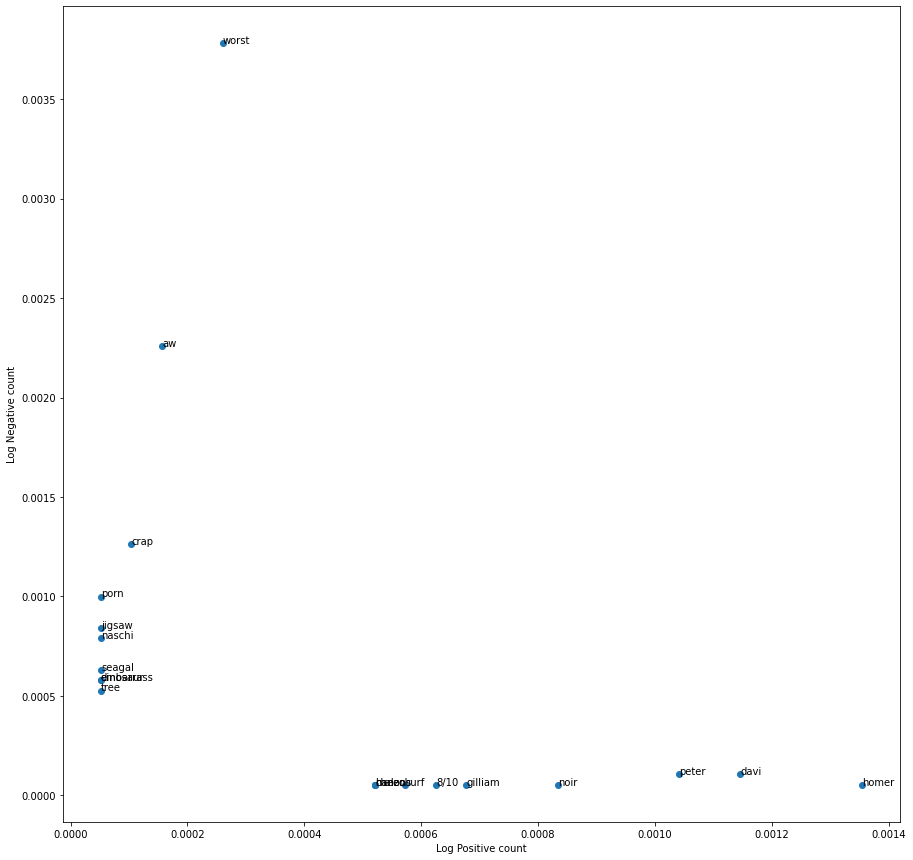

In [248]:

import matplotlib.pyplot as plt # Library for plots

fig, ax = plt.subplots(figsize = (15, 15))

pp = []
nn = []
colors = []
for w in top_word_list:
  pp.append(pos_prob[w])
  nn.append(neg_prob[w])

# convert positive raw counts to logarithmic scale. we add 1 to avoid log(0)
x = np.log([x + 1 for x in pp])  
y = np.log([y + 1 for y in nn]) 

# Plot a dot for each pair of words
ax.scatter(x, y)  

# assign axis labels
plt.xlabel("Log Positive count")
plt.ylabel("Log Negative count")

# Add the word as the label at the same position as you added the points just before
for i,word in enumerate(top_word_list):
    ax.annotate(word, (x[i], y[i]), fontsize=10)

#x.plot([0, 0.0014],[0, 0.0014], color = 'red') # Plot the red line that divides the 2 areas.
plt.show()

In [251]:
def predict_naive_bayes(review, log_likelihood, ratio):
  p = 0
  for word in clean_review(review):
    p += log_likelihood.get(word,0)
  
  p += math.log(ratio)
  return p

In [253]:
r = df['text'].tolist()[-1]
predict_naive_bayes(r,log_likelihood,1)

16.168832724135342

In [255]:
df['label'].tolist()[-1]

'positive'